DSCI GROUP PROJECT 003 32 Yuhan Liu

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
players <- read_csv("players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
sessions <- read_csv("sessions.csv")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

(1) Data Description: The players contains 196 observations and 7 variables, including exprience,hashedEmail,name,gender,played_hours,age and subscribe. The key reposonse variable is subscribe, it is the logical variable indicating whether the player subscribed to a game-related newsletter. Predictor variables include numerical features like age and played_hours. The dataset may contain missing or inconsistent entries, and the subscription rate may be unbalanced. The sessions contains 1535 observations and 5 variables: hashedEmail,start_time,end_time,original_start_time,original_end_time. It records session level activity, which can be used to calculate total playtime, session frequency and active hours. The two dataset both have hashedEmail, so they can be linked by using this variable. 

(2)Questions: Broad Question: what player characteristics and behaviors are most predictable of subscribing to a game-related newsletter? 

Specific question: Can player characteristics like age, experience and total played hours predict whether a player subscribes to the newsletter? 

The analysis will use the players.csv dataset and may be combined with the aggregated session information from the sessions.csv file. The goal is to determine which features are closely related to the likelihood of subscription.

In [7]:
library(tidyverse)
players_var <-players|>
              select(experience, gender, Age, played_hours, subscribe)
players_var

experience,gender,Age,played_hours,subscribe
<chr>,<chr>,<dbl>,<dbl>,<lgl>
Pro,Male,9,30.3,TRUE
Veteran,Male,17,3.8,TRUE
Veteran,Male,17,0.0,FALSE
Amateur,Female,21,0.7,TRUE
Regular,Male,21,0.1,TRUE
Amateur,Female,17,0.0,TRUE
Regular,Female,19,0.0,TRUE
Amateur,Male,21,0.0,FALSE
Amateur,Male,47,0.1,TRUE


In [8]:
library(tidyverse)
players_clean <- players_var |>
                summarise(mean_age = mean(Age,na.rm = TRUE),
                         mean_hours = mean(played_hours,na.rm = TRUE),
                         subscribe_rate = mean(subscribe, na.rm = TRUE))
players_clean

mean_age,mean_hours,subscribe_rate
<dbl>,<dbl>,<dbl>
21.13918,5.845918,0.7346939


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


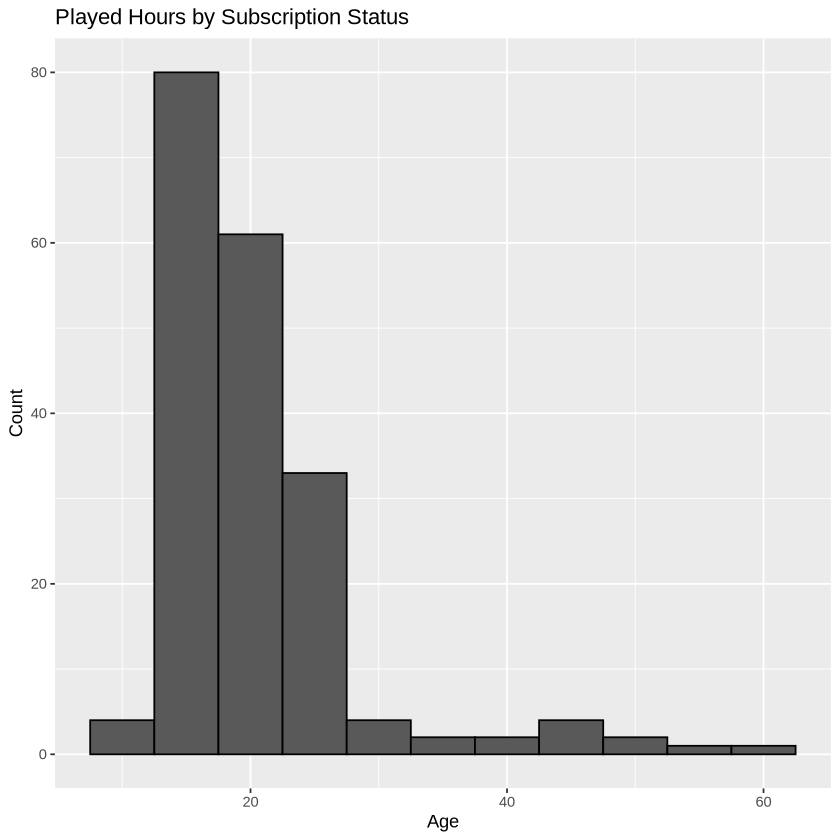

In [9]:
library(ggplot2)
players_age <- ggplot(players_var, aes(x = Age))+
                geom_histogram(binwidth = 5, color = "black")+
                labs(title = "Played Hours by Subscription Status",
                    x = "Age",
                    y = "Count")
players_age